In [0]:
import pandas as pd

df_sliding_01 = pd.read_csv("/dbfs/FileStore/shared_uploads/v_him databricks@uncg.edu/sliding_image01.csv", index_col=0)
df_sliding_012 = pd.read_csv("/dbfs/FileStore/shared_uploads/v_him databricks@uncg.edu/sliding_image012.csv",index_col=0)
df_block_01 = pd.read_csv("/dbfs/FileStore/shared_uploads/v_him databricks@uncg.edu/block_img_0_1.csv",index_col=0)
df_block_012 = pd.read_csv("/dbfs/FileStore/shared_uploads/v_him databricks@uncg.edu/block_img_0_1_2.csv",index_col=0)


In [0]:
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostRegressor
import seaborn as sns
from sklearn import metrics
from plot_metric.functions import BinaryClassification
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib as mpl
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [0]:
#helper function
    
#generate train test split
def gen_train_test(df):
    x = df.iloc[:,:64]
    y = df['label']
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)
    return x_train, x_test, y_train, y_test

#generate label
def gen_label_en(df):  
    df['img'] = df['img'].astype(str)
    label = preprocessing.LabelEncoder()
    df['label'] = label.fit_transform(df['img'].values.tolist())
    return df

In [0]:
df_nonoverlapping_01 = gen_label_en(df_block_01)
df_nonoverlapping_012 = gen_label_en(df_block_012)
df_overlapping_01 = gen_label_en(df_sliding_01)
df_overlapping_012 = gen_label_en(df_sliding_012)

In [0]:
df_nonoverlapping_01

Out[12]:

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,img,label
feature vector 363,223,224,225,226,225,224,224,225,223,224,225,226,226,225,223,224,223,224,224,222,221,220,222,223,223,224,223,222,222,222,222,224,223,224,223,222,222,222,224,225,223,223,222,221,222,223,225,226,224,222,223,223,224,225,226,226,224,223,226,225,225,226,226,226,img_0,0
feature vector 798,192,193,193,193,193,193,193,193,194,194,193,193,193,193,193,193,195,194,193,193,193,193,193,193,195,194,193,193,193,193,193,192,195,194,193,193,193,193,193,192,194,193,193,194,193,193,193,192,193,194,195,196,194,193,193,192,193,193,193,195,193,193,193,192,img_1,1
feature vector 949,192,198,200,197,197,196,197,197,193,197,199,198,197,196,197,198,197,198,195,194,197,197,198,198,196,197,196,194,197,198,198,198,198,199,199,198,198,198,198,198,200,199,200,200,197,198,197,197,199,198,200,200,197,198,197,197,201,199,200,200,198,200,198,197,img_0,0
feature vector 843,178,178,178,178,177,177,177,178,178,178,178,178,177,177,177,178,178,178,178,178,177,177,177,178,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,176,176,175,175,175,175,175,177,176,175,174,174,174,174,174,177,176,175,174,174,174,174,174,177,img_1,1
feature vector 342,223,224,225,224,224,225,226,226,223,224,225,225,226,227,226,226,223,224,225,226,226,227,226,226,222,224,225,226,226,226,227,225,222,224,225,226,226,226,227,225,223,224,225,226,226,226,227,225,222,224,225,226,226,226,227,225,224,224,225,226,226,226,227,225,img_0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature vector 323,226,229,226,225,225,226,225,225,228,229,226,225,225,226,225,225,223,223,225,226,226,226,227,227,225,223,223,224,226,227,226,226,224,223,223,223,225,226,226,226,221,221,224,224,224,224,224,224,224,226,226,226,225,225,221,223,226,226,228,227,227,227,222,223,img_0,0
feature vector 1259,102,104,101,99,98,98,95,94,103,103,99,97,95,95,93,91,100,98,96,94,93,94,93,91,94,91,92,90,89,91,88,86,89,86,88,85,85,89,87,84,88,86,85,84,84,87,87,86,82,85,84,84,84,86,87,87,83,85,84,84,84,84,87,89,img_0,0
feature vector 54,212,213,214,216,216,214,215,217,212,213,214,216,216,214,215,217,212,213,214,215,215,215,215,216,212,213,214,214,215,215,214,214,211,212,213,214,215,215,214,214,208,210,211,214,214,215,215,215,209,211,211,212,212,213,213,213,210,213,212,213,213,214,215,215,img_0,0
feature vector 403,222,222,222,223,223,223,222,223,223,222,222,222,221,221,223,223,221,221,222,221,221,221,224,223,218,220,221,222,222,223,223,223,219,220,221,222,223,224,223,223,222,221,223,224,224,225,223,223,224,226,227,227,225,223,223,223,224,225,227,226,224,224,223,223,img_0,0


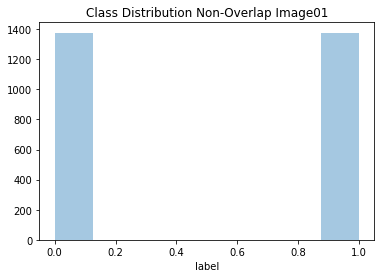

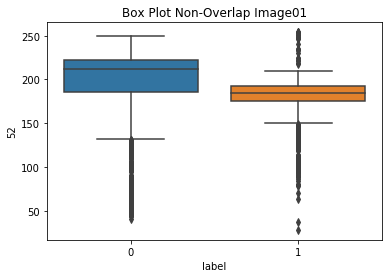

In [0]:
sns.distplot(df_nonoverlapping_01.label, kde=False)
plt.title("Class Distribution Non-Overlap Image01")
plt.show()
sns.boxplot(data = df_nonoverlapping_01, x='label', y= '52')
plt.title("Box Plot Non-Overlap Image01")
plt.show()

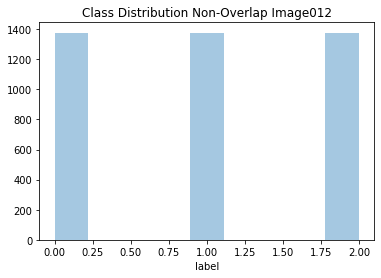

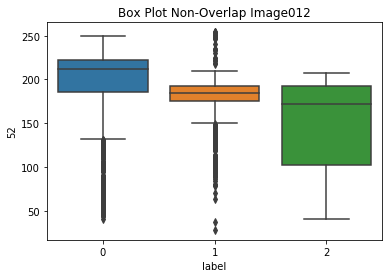

In [0]:
sns.distplot(df_nonoverlapping_012.label, kde=False)
plt.title("Class Distribution Non-Overlap Image012")
plt.show()
sns.boxplot(data = df_nonoverlapping_012, x='label', y= '52')
plt.title("Box Plot Non-Overlap Image012")
plt.show()

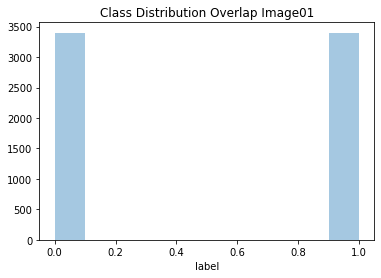

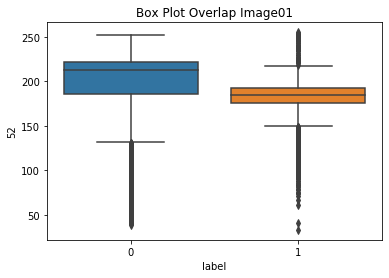

In [0]:
sns.distplot(df_overlapping_01.label, kde=False)
plt.title("Class Distribution Overlap Image01")
plt.show()
sns.boxplot(data = df_overlapping_01, x='label', y= '52')
plt.title("Box Plot Overlap Image01")
plt.show()

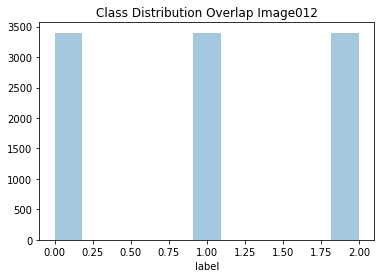

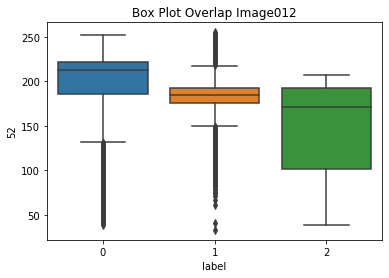

In [0]:
sns.distplot(df_overlapping_012.label, kde=False)
plt.title("Class Distribution Overlap Image012")
plt.show()
sns.boxplot(data = df_overlapping_012, x='label', y= '52')
plt.title("Box Plot Overlap Image012")
plt.show()

In [0]:
x_train_nonover_01, x_test_nonover_01, y_train_nonover_01, y_test_nonover_01 = gen_train_test(df_nonoverlapping_01)
x_train_nonover_012, x_test_nonover_012, y_train_nonover_012, y_test_nonover_012 = gen_train_test(df_nonoverlapping_012)


x_train_over_01, x_test_over_01, y_train_over_01, y_test_over_01 = gen_train_test(df_overlapping_01)
x_train_over_012, x_test_over_012, y_train_over_012, y_test_over_012 = gen_train_test(df_overlapping_012)

In [0]:
#generate random forest model with given x and y test dataset
def Random_forest(x_train, y_train, x_test, y_test):
    clf = RandomForestClassifier(n_estimators=100, bootstrap = True, max_depth = 110, min_samples_leaf = 4
                             , min_samples_split = 10, random_state=0, n_jobs=1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
  
    print(f'Final Training Accuracy: {clf.score(x_train,y_train)}')
    print("Testing Accuracy : ", accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    mpl.rcParams.update(mpl.rcParamsDefault)
    #display confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    
    if(len(y_test.unique()) == 2):
        class_names = [0,1]
    else:
        class_names = [0,1,2]

    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, x_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                    normalize=normalize)
        disp.ax_.set_title(title)
        disp.ax_.grid(False) 
    plt.figure(figsize=(5,5))   
    plt.show()
    return y_pred, y_test

#function to scale data
def scale_data(x_train, x_test):
        scaler = StandardScaler()
        scaler.fit(x_train)
        x_train = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
        return x_train, x_test
#generate auc_curve 
def auc_curve(y_pred, y_test, title:str):
    bc = BinaryClassification(y_test, y_pred, labels=["Class 0", "Class 1"])
    bc.plot_roc_curve()
    plt.title(title)
    return plt.show()



def gen_roc_mult(df):

    X = df.iloc[:,:64].to_numpy()
    y = df.iloc[:,65].to_numpy()

    y = label_binarize(y, classes=[0,1,2])
    n_classes = 3

    # shuffle and split training and test sets
    X_train, X_test, y_train, y_test =\
        train_test_split(X, y, test_size=0.33, random_state=0)

    # classifier
    clf = OneVsRestClassifier(LinearSVC(random_state=123))
    y_score = clf.fit(X_train, y_train).decision_function(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot of a ROC curve for a specific class
    for i in range(n_classes):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('AUC CURVE FOR CLASS {}'.format(str(i)))
        plt.legend(loc="lower right")
    return plt.show()    

Final Training Accuracy: 0.955474784189005
Testing Accuracy : 0.9183303085299456
 precision recall f1-score support

 0 0.96 0.88 0.91 272
 1 0.89 0.96 0.92 279

 accuracy 0.92 551
 macro avg 0.92 0.92 0.92 551
weighted avg 0.92 0.92 0.92 551

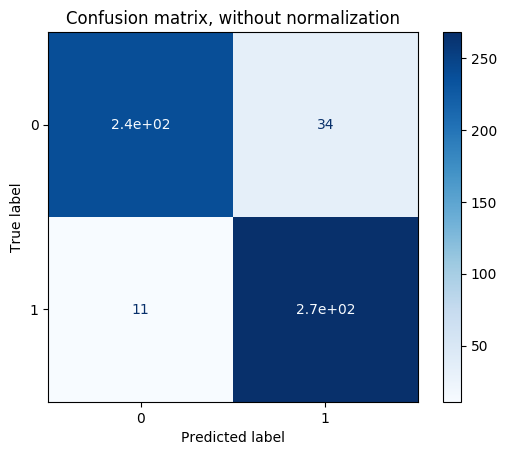

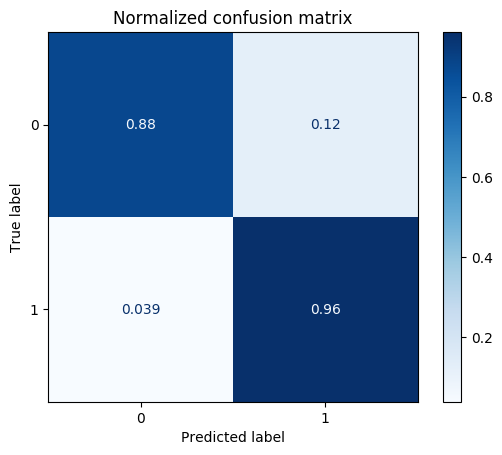

In [0]:
x_train_scaled, x_test_scaled = scale_data(x_train_nonover_01, x_test_nonover_01)
y_pred, y_test = Random_forest(x_train_scaled, y_train_nonover_01, x_test_scaled, y_test_nonover_01)


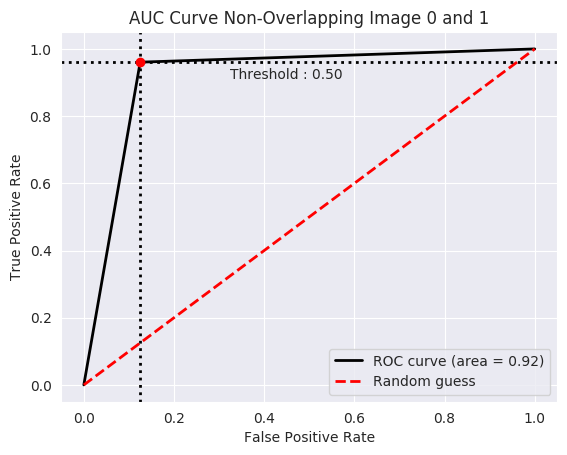

In [0]:
auc_curve(y_pred, y_test, "AUC Curve Non-Overlapping Image 0 and 1")

Final Training Accuracy: 0.9279224712295578
Testing Accuracy : 0.7990314769975787
 precision recall f1-score support

 0 0.92 0.77 0.84 281
 1 0.74 0.81 0.77 279
 2 0.76 0.82 0.79 266

 accuracy 0.80 826
 macro avg 0.81 0.80 0.80 826
weighted avg 0.81 0.80 0.80 826

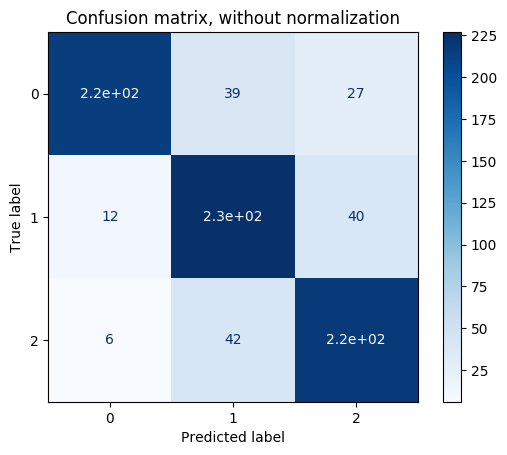

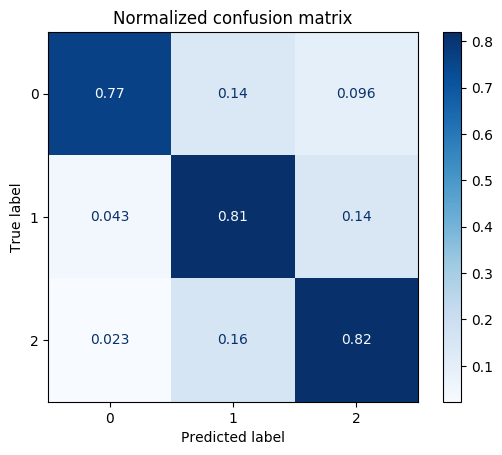

In [0]:

x_train_scaled, x_test_scaled = scale_data(x_train_nonover_012, x_test_nonover_012)
y_pred, y_test = Random_forest(x_train_scaled, y_train_nonover_012, x_test_scaled, y_test_nonover_012)


/databricks/python/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 "the number of iterations.", ConvergenceWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 "the number of iterations.", ConvergenceWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 "the number of iterations.", ConvergenceWarning)

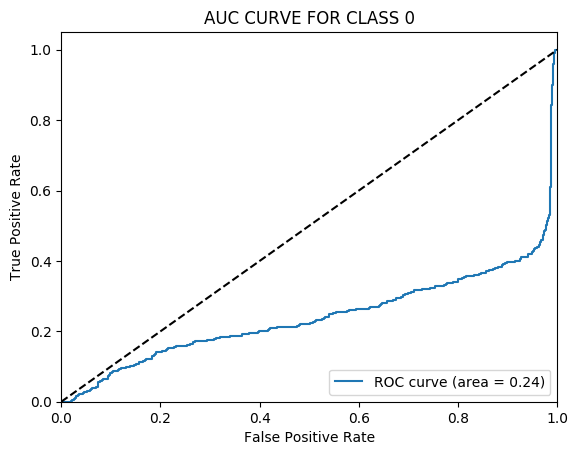

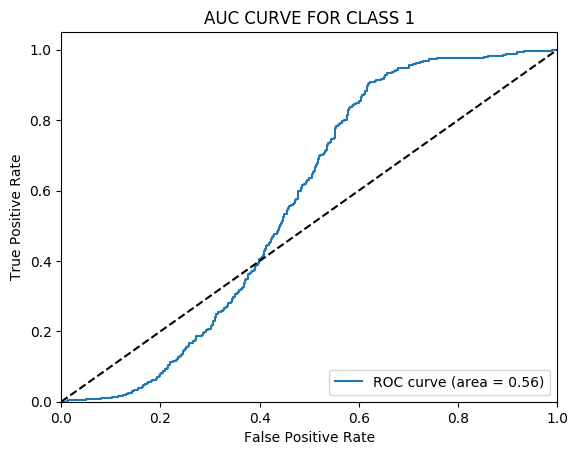

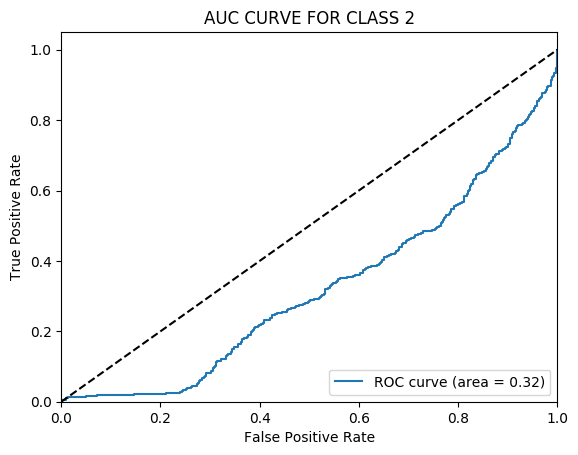

In [0]:
gen_roc_mult(df_block_012)
    


Final Training Accuracy: 0.9700367647058824
Testing Accuracy : 0.9205882352941176
 precision recall f1-score support

 0 0.95 0.89 0.92 664
 1 0.90 0.95 0.92 696

 accuracy 0.92 1360
 macro avg 0.92 0.92 0.92 1360
weighted avg 0.92 0.92 0.92 1360

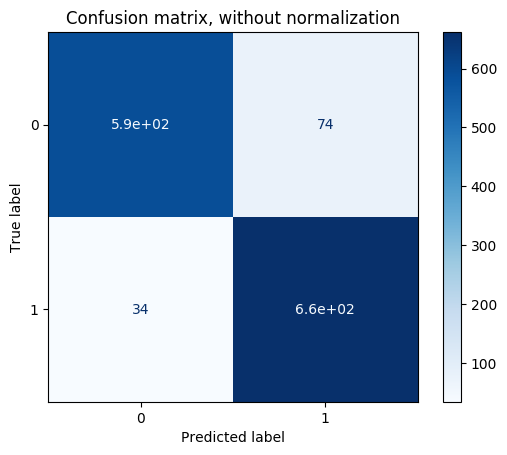

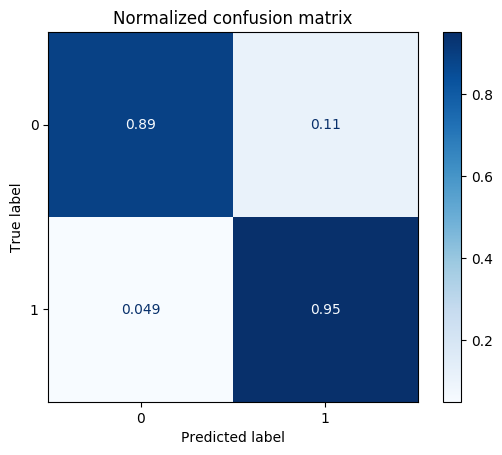

In [0]:
x_train_scaled, x_test_scaled = scale_data(x_train_over_01, x_test_over_01)
y_pred, y_test = Random_forest(x_train_scaled, y_train_over_01, x_test_scaled, y_test_over_01)

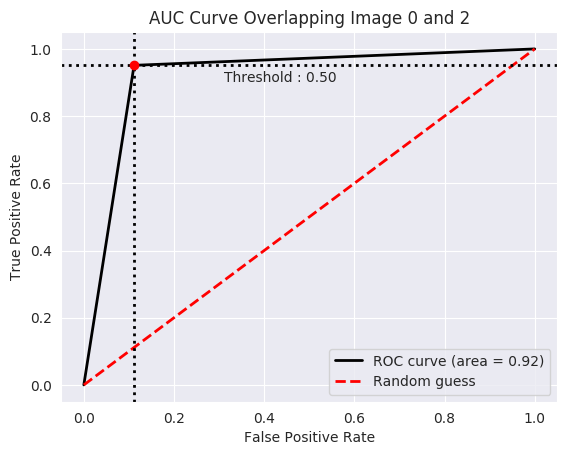

In [0]:
auc_curve(y_pred, y_test, "AUC Curve Overlapping Image 0 and 1")

Final Training Accuracy: 0.9504901960784313
Testing Accuracy : 0.859313725490196
 precision recall f1-score support

 0 0.95 0.82 0.88 677
 1 0.80 0.90 0.85 693
 2 0.85 0.86 0.86 670

 accuracy 0.86 2040
 macro avg 0.87 0.86 0.86 2040
weighted avg 0.87 0.86 0.86 2040

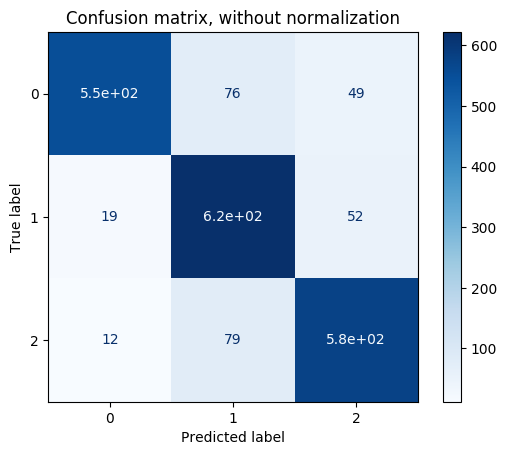

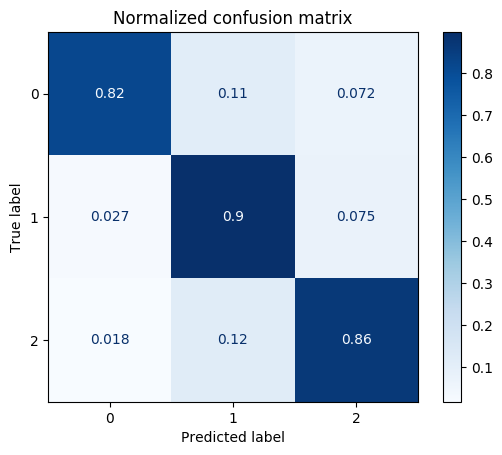

In [0]:
x_train_scaled, x_test_scaled = scale_data(x_train_over_012, x_test_over_012)
y_pred, y_test = Random_forest(x_train_scaled, y_train_over_012, x_test_scaled, y_test_over_012)

/databricks/python/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 "the number of iterations.", ConvergenceWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 "the number of iterations.", ConvergenceWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 "the number of iterations.", ConvergenceWarning)

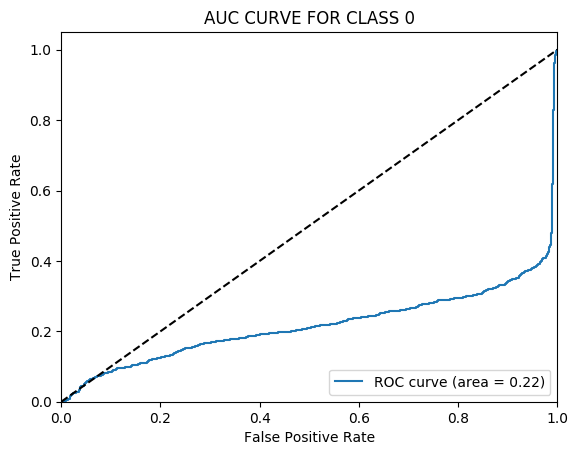

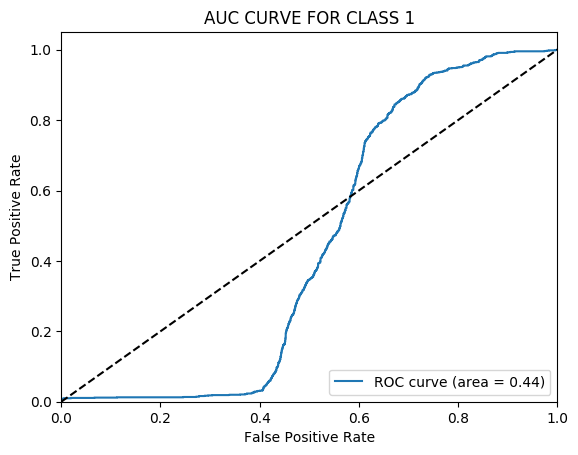

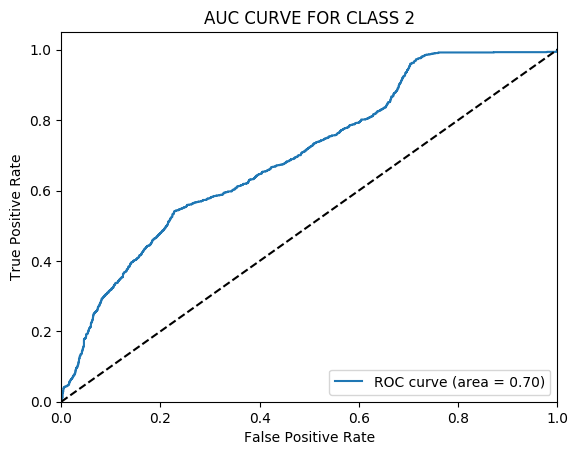

In [0]:
gen_roc_mult(df_sliding_012)